In [23]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:\\Users\\User\\Downloads\\titanic_train.csv')
df.shape[0]
df['Pclass']=df['Pclass'].map({1:'first',2:'second',3:'third'})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,first,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,first,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Checking for Nulls

In [15]:
print(df[df.Age.isna()].shape[0],df[df.Cabin.isna()].shape[0]) # 177 Null Ages # 687 Null Cabin

177 687


19.8% Age is Null and 77.1% Cabin is Null. This needs to be handled.

# Exploratory Data Analysis

Age

<Axes: xlabel='Age', ylabel='Sex'>

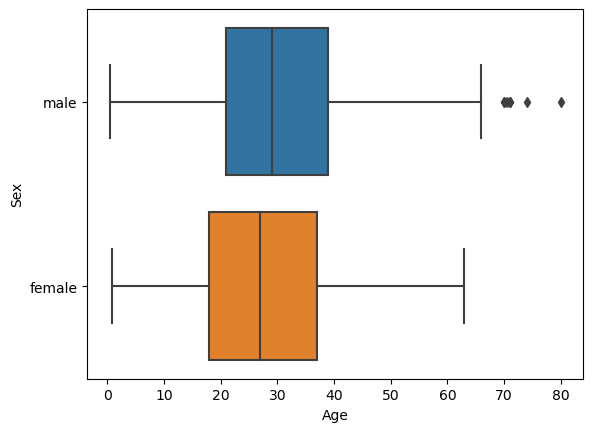

In [73]:
sns.boxplot(x=df["Age"],y=df['Sex'])
# Most Passengers are in the age group 20-30 across sexes

<Axes: xlabel='Age', ylabel='Pclass'>

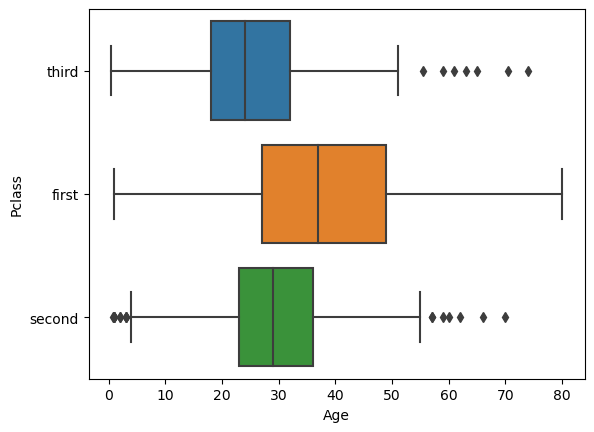

In [74]:
sns.boxplot(data=df, x="Age", y=str("Pclass")) 
# First class passengers are slightly elder than the other classes, Third class has some outliers of age > 50

<Axes: xlabel='Survived', ylabel='count'>

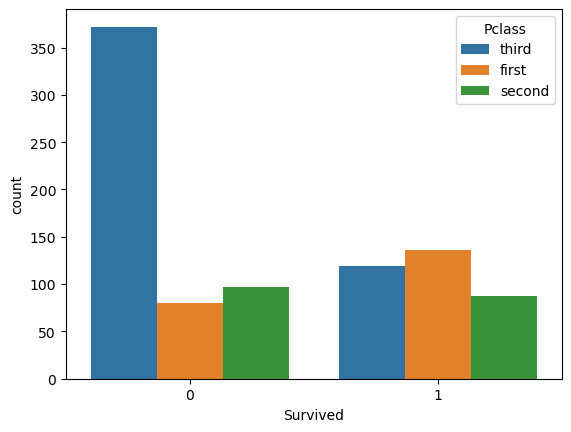

In [83]:
sns.countplot(data=df,x=df['Survived'],hue='Pclass')
# Third class is prone to death compared to the other classes

<Axes: xlabel='Fare', ylabel='Count'>

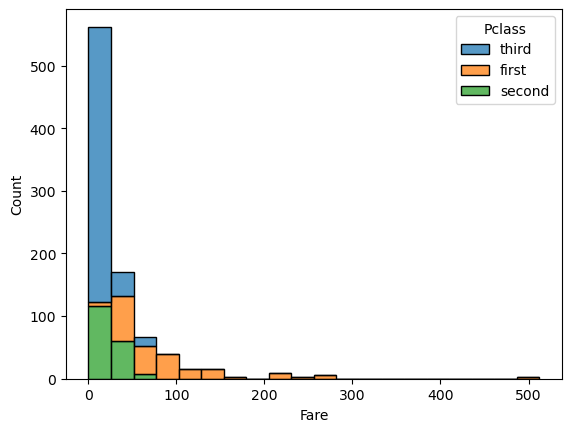

In [91]:
sns.histplot(data=df,x='Fare',bins=20,hue='Pclass',multiple='stack')
# Third class and second class tickets are  below 40 ,first class tickets range from 0 to 500

<Axes: xlabel='Survived', ylabel='count'>

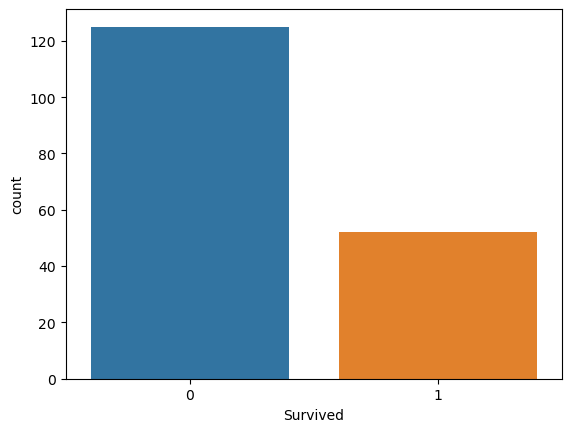

In [105]:
sns.countplot(data=df[df['Age'].isna()],x='Survived') 
# 120 data has no age : may be of third class passengers who got over the counter tickets
# Null Age cannot be ignored it should be imputed.

Text(0.5, 1.0, 'Fare Age Relation')

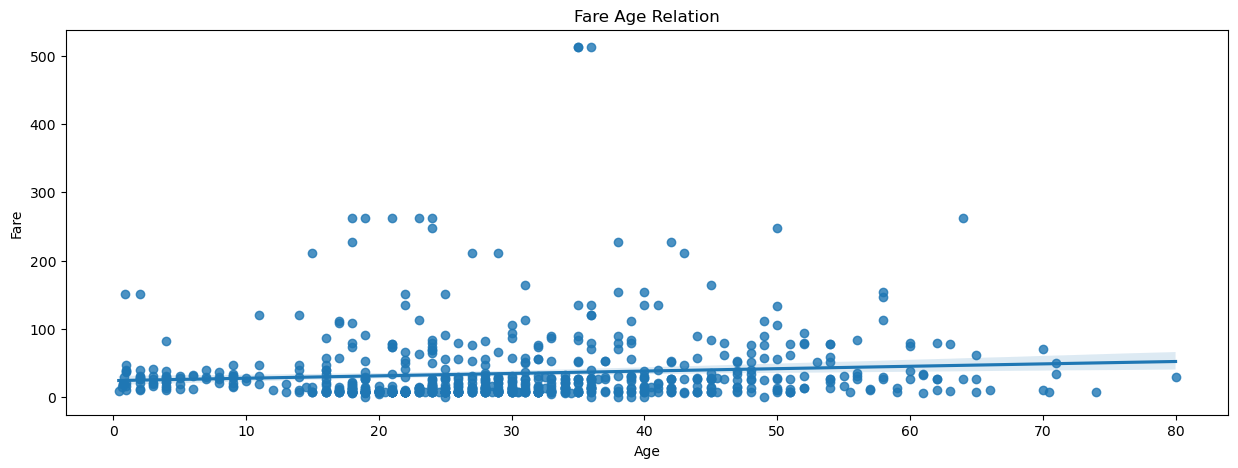

In [126]:
# Create subplots
fig, axs = plt.subplots(1, 1, figsize=(15, 5))

# Plot regplots
sns.regplot(data=df[~df['Age'].isna()], x="Age", y="Fare", ax=axs)
axs.set_title('Fare Age Relation')
# No Significant relationship between Age and Fare

Text(0.5, 1.0, 'Sex Embarked Count')

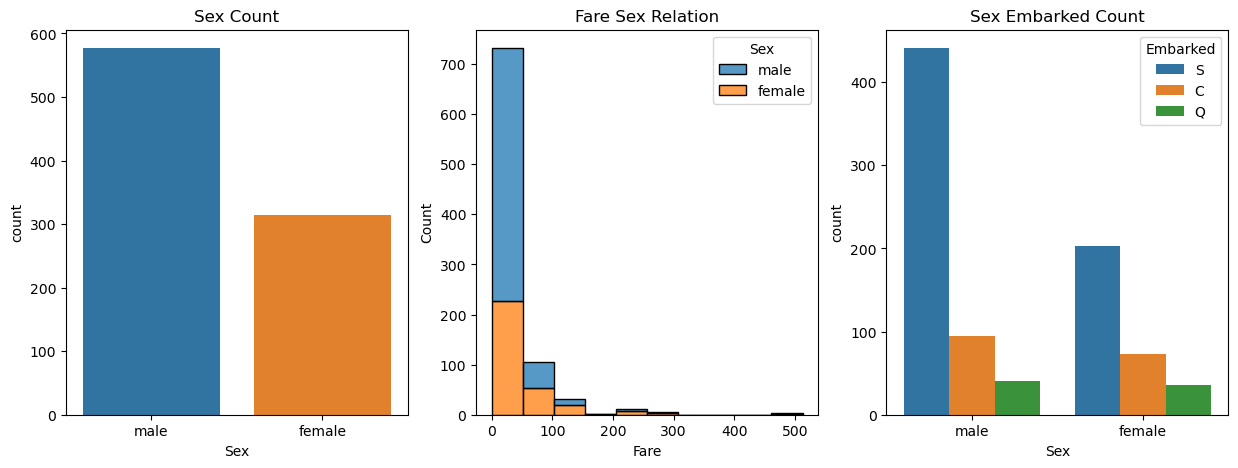

In [127]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Plot regplots
sns.countplot(data=df, x="Sex", ax=axs[0])
axs[0].set_title('Sex Count')
sns.histplot(data=df,x='Fare',bins=10,hue='Sex',multiple='stack',ax=axs[1])
axs[1].set_title('Fare Sex Relation')
sns.countplot(data=df, x="Sex", ax=axs[2],hue='Embarked')
axs[2].set_title('Sex Embarked Count')
sns.countplot(data=df, x="Sex", ax=axs[3],hue='Embarked')
axs[3].set_title('Sex Embarked Count')

Male is almost 65% of the total passengers and most of the passengers travelled in the fare of 0-50. Most of the embarking is done at S followed by C and Q. 

Imputing

In [4]:
knn_imputer = KNNImputer(n_neighbors=5)
imputer = IterativeImputer()
df['Age']=imputer.fit_transform(df[['Age']])
df['Age']=df['Age'].apply(math.ceil)
mode_value = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(mode_value)

In [5]:
# Since 687 Null values of Cabin , it will not contribute much to the survival.
df = df.drop('Cabin', axis=1)

In [ ]:
Using Label encoding for categorical variables with less category and Dummies for columns with more category

In [6]:
df['Sex']=preprocessing.LabelEncoder().fit_transform(df['Sex'])
df['Embarked']=preprocessing.LabelEncoder().fit_transform(df['Embarked'])
df['Pclass']=preprocessing.LabelEncoder().fit_transform(df['Pclass'])
df['SibSp']=preprocessing.LabelEncoder().fit_transform(df['SibSp'])
df['Parch']=preprocessing.LabelEncoder().fit_transform(df['Parch'])
df=pd.get_dummies(data=df,columns=['Age','Ticket','Name'])
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_1,Age_2,...,"Name_Yrois, Miss. Henriette (""Mrs Harbeck"")","Name_Zabour, Miss. Hileni","Name_Zabour, Miss. Thamine","Name_Zimmerman, Mr. Leo","Name_de Messemaeker, Mrs. Guillaume Joseph (Emma)","Name_de Mulder, Mr. Theodore","Name_de Pelsmaeker, Mr. Alfons","Name_del Carlo, Mr. Sebastiano","Name_van Billiard, Mr. Austin Blyler","Name_van Melkebeke, Mr. Philemon"
0,1,0,2,1,1,0,7.2500,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,0,0,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,2,0,0,0,7.9250,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,1,0,53.1000,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,2,1,0,0,8.0500,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Normalising Fare column
scaler = StandardScaler()
df['Fare'] = scaler.fit_transform(df[['Fare']])

In [8]:
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_1,Age_2,...,"Name_Yrois, Miss. Henriette (""Mrs Harbeck"")","Name_Zabour, Miss. Hileni","Name_Zabour, Miss. Thamine","Name_Zimmerman, Mr. Leo","Name_de Messemaeker, Mrs. Guillaume Joseph (Emma)","Name_de Mulder, Mr. Theodore","Name_de Pelsmaeker, Mr. Alfons","Name_del Carlo, Mr. Sebastiano","Name_van Billiard, Mr. Austin Blyler","Name_van Melkebeke, Mr. Philemon"
0,1,0,2,1,1,0,-0.502445,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,0,0,1,0,0.786845,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,2,0,0,0,-0.488854,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,1,0,0.420730,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,2,1,0,0,-0.486337,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
y=df['Survived']
X=df.drop(['Survived'],axis=1)
print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

     PassengerId  Pclass  Sex  SibSp  Parch      Fare  Embarked  Age_1  Age_2  \
0              1       2    1      1      0 -0.502445         2      0      0   
1              2       0    0      1      0  0.786845         0      0      0   
2              3       2    0      0      0 -0.488854         2      0      0   
3              4       0    0      1      0  0.420730         2      0      0   
4              5       2    1      0      0 -0.486337         2      0      0   
..           ...     ...  ...    ...    ...       ...       ...    ...    ...   
886          887       1    1      0      0 -0.386671         2      0      0   
887          888       0    0      0      0 -0.044381         2      0      0   
888          889       2    0      1      2 -0.176263         2      0      0   
889          890       0    1      0      0 -0.044381         0      0      0   
890          891       2    1      0      0 -0.492378         1      0      0   

     Age_3  ...  Name_Yrois

# Since there are 1650 columns in X ,it is prone to overfitting . Let us remove multicollinearity and capture the columns with high variability and influence in the output.

In [10]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
X_train=pca.fit_transform(X_train)

In [11]:
pca.explained_variance_

array([6.73180708e+04, 1.59947897e+00, 1.30515067e+00, 5.76851871e-01,
       4.53682214e-01, 3.54631493e-01, 1.96974451e-01, 1.65191793e-01,
       3.93146152e-02, 3.51496236e-02])

In [12]:
X_test = pca.transform(X_test)

Train Model

In [13]:
# Example: Using Support Vector Machine (SVM) classifier
clf1 = SVC()
clf1.fit(X_train, y_train)

SVC()

In [13]:
accuracy = clf1.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.5932203389830508


In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming you have trained your model and obtained predictions
y_pred_svm = clf1.predict(X_test)

# Compare y_test and y_pred using accuracy score
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:\n", conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred_svm)
print("Classification Report:\n", class_report)

Accuracy: 0.5932203389830508
Confusion Matrix:
 [[175   0]
 [120   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      1.00      0.74       175
           1       0.00      0.00      0.00       120

    accuracy                           0.59       295
   macro avg       0.30      0.50      0.37       295
weighted avg       0.35      0.59      0.44       295



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
clf2 = LogisticRegression()
clf2.fit(X_train, y_train)
# Assuming you have trained your model and obtained predictions
y_pred_lr = clf2.predict(X_test)

# Compare y_test and y_pred using accuracy score
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:\n", conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred_lr)
print("Classification Report:\n", class_report)

Accuracy: 0.7932203389830509
Confusion Matrix:
 [[147  28]
 [ 33  87]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       175
           1       0.76      0.72      0.74       120

    accuracy                           0.79       295
   macro avg       0.79      0.78      0.78       295
weighted avg       0.79      0.79      0.79       295



C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
clf3 = DecisionTreeClassifier()
clf3.fit(X_train, y_train)
# Assuming you have trained your model and obtained predictions
y_pred_dtc = clf3.predict(X_test)

# Compare y_test and y_pred using accuracy score
accuracy = accuracy_score(y_test, y_pred_dtc)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dtc)
print("Confusion Matrix:\n", conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred_dtc)
print("Classification Report:\n", class_report)

Accuracy: 0.7559322033898305
Confusion Matrix:
 [[141  34]
 [ 38  82]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       175
           1       0.71      0.68      0.69       120

    accuracy                           0.76       295
   macro avg       0.75      0.74      0.75       295
weighted avg       0.75      0.76      0.76       295



In [17]:
clf4 = GaussianNB()
clf4.fit(X_train, y_train)
# Assuming you have trained your model and obtained predictions
y_pred_nb = clf4.predict(X_test)

# Compare y_test and y_pred using accuracy score
accuracy = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix:\n", conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred_nb)
print("Classification Report:\n", class_report)

Accuracy: 0.735593220338983
Confusion Matrix:
 [[138  37]
 [ 41  79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78       175
           1       0.68      0.66      0.67       120

    accuracy                           0.74       295
   macro avg       0.73      0.72      0.72       295
weighted avg       0.73      0.74      0.73       295



In [19]:
clf5 = RandomForestClassifier()
clf5.fit(X_train, y_train)
# Assuming you have trained your model and obtained predictions
y_pred_rfc = clf5.predict(X_test)

# Compare y_test and y_pred using accuracy score
accuracy = accuracy_score(y_test, y_pred_rfc)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rfc)
print("Confusion Matrix:\n", conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred_rfc)
print("Classification Report:\n", class_report)

Accuracy: 0.7966101694915254
Confusion Matrix:
 [[157  18]
 [ 42  78]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       175
           1       0.81      0.65      0.72       120

    accuracy                           0.80       295
   macro avg       0.80      0.77      0.78       295
weighted avg       0.80      0.80      0.79       295



Of all the 5 models Random Forest gets better accuracy . Let us improve the accuracy by fine tuning hyper parameters

In [22]:
# Initialize Logistic Regression model
rand_for = RandomForestClassifier()

# Define hyperparameters grid
param_grid = {
    'n_estimators': [100],  # Number of trees in the forest
    'max_depth': [None],  # Maximum depth of the trees
    'min_samples_split': [2],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1,],  # Minimum number of samples required at each leaf node
    'max_features': ['sqrt']  # Number of features to consider at each split
}
# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=rand_for, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.8
Confusion Matrix:
 [[158  17]
 [ 42  78]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       175
           1       0.82      0.65      0.73       120

    accuracy                           0.80       295
   macro avg       0.81      0.78      0.78       295
weighted avg       0.80      0.80      0.80       295



This model has highest accuracy of 80% and AUC of 0.84

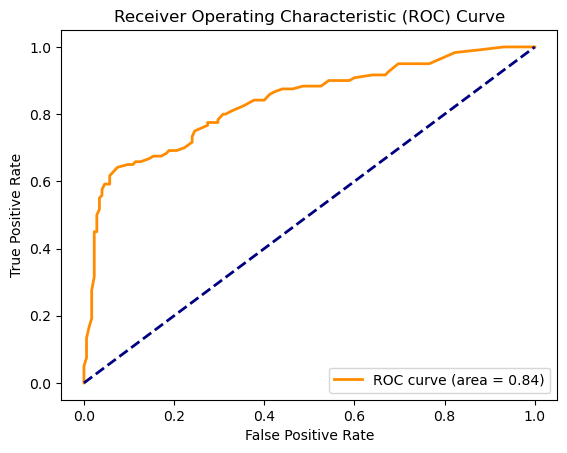

In [25]:
# Get predicted probabilities for the positive class
y_probs = grid_search.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()